# 01_2.EDA(범주형 자료 분석)(연습문제)

## 1.package 설치

In [1]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and direc

In [ ]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

In [ ]:
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
url = "https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/01_2.OnlineGame.csv"
online_df = pd.read_csv(url, encoding="cp949")
online_df.head(10)

,no,성별,결혼,학력,연령,도구,보상,정보,디자인,공동체,몰입,충성도
0,1,1,2,3,18,2,7,6,12,12,8,6
1,2,2,2,2,22,2,8,3,11,6,4,4
2,3,2,2,2,26,2,8,7,14,18,12,9
3,4,1,2,4,34,2,8,7,18,15,4,7
4,5,1,2,4,28,2,9,8,16,23,14,11
5,6,1,2,2,26,2,9,9,24,24,16,12
6,7,1,2,1,30,2,10,8,12,17,11,8
7,8,2,1,2,25,2,10,8,19,21,12,10
8,9,2,2,3,21,2,12,3,10,6,4,3
9,10,1,1,3,31,3,5,8,23,18,9,9


### 2.2 자료구조 살펴보기

In [ ]:
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   no      376 non-null    int64
 1   성별      376 non-null    int64
 2   결혼      376 non-null    int64
 3   학력      376 non-null    int64
 4   연령      376 non-null    int64
 5   도구      376 non-null    int64
 6   보상      376 non-null    int64
 7   정보      376 non-null    int64
 8   디자인     376 non-null    int64
 9   공동체     376 non-null    int64
 10  몰입      376 non-null    int64
 11  충성도     376 non-null    int64
dtypes: int64(12)
memory usage: 35.4 KB


In [ ]:
online_df.shape

(376, 12)

In [ ]:
online_df.dtypes

no     int64
성별     int64
결혼     int64
학력     int64
연령     int64
도구     int64
보상     int64
정보     int64
디자인    int64
공동체    int64
몰입     int64
충성도    int64
dtype: object

### 2.3 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
online_df['성별'] = online_df['성별'].replace ([1,2], ['남자','여자'])
online_df['결혼'].replace({1:'결혼', 2:'미혼'}, inplace=True)
online_df['학력'].replace({1:'초중고생', 2:'고졸', 3:'대학생', 4:'대졸'}, inplace=True)

online_df.head()

,no,성별,결혼,학력,연령,도구,보상,정보,디자인,공동체,몰입,충성도
0,1,남자,미혼,대학생,18,2,7,6,12,12,8,6
1,2,여자,미혼,고졸,22,2,8,3,11,6,4,4
2,3,여자,미혼,고졸,26,2,8,7,14,18,12,9
3,4,남자,미혼,대졸,34,2,8,7,18,15,4,7
4,5,남자,미혼,대졸,28,2,9,8,16,23,14,11


In [ ]:
online_df.dtypes

no      int64
성별     object
결혼     object
학력     object
연령      int64
도구      int64
보상      int64
정보      int64
디자인     int64
공동체     int64
몰입      int64
충성도     int64
dtype: object

In [ ]:
# datatype을 categroy로 변경
online_df['성별'] = online_df['성별'].astype('category')
online_df['결혼'] = online_df['결혼'].astype('category')
online_df['학력'] = online_df['학력'].astype('category')

In [ ]:
online_df.dtypes

no        int64
성별     category
결혼     category
학력     category
연령        int64
도구        int64
보상        int64
정보        int64
디자인       int64
공동체       int64
몰입        int64
충성도       int64
dtype: object

## 3.범주형 변수(1개) (one categorical)

### 3.1 돗수분포표(freq_table)

In [ ]:
# value_counts()
online_df['성별'].value_counts()

여자    209
남자    167
Name: 성별, dtype: int64

In [ ]:
freq_table = pd.DataFrame(online_df['성별'].value_counts())
freq_table.columns = ['count']
freq_table

,count
여자,209
남자,167


In [ ]:
### crosstab이용
freq_table = pd.crosstab(index = online_df["성별"],
                         columns = ['count'])
freq_table

col_0,count
성별,
남자,167
여자,209


In [ ]:
# 비율 추가
freq_table['prop'] = np.round(freq_table['count']/sum(freq_table['count']), 2)
freq_table

col_0,count,prop
성별,,
남자,167,0.44
여자,209,0.56


In [ ]:
# 누적 비율
freq_table['cum_prop'] = np.cumsum(freq_table['prop'])
freq_table

col_0,count,prop,cum_prop
성별,,,
남자,167,0.44,0.44
여자,209,0.56,1.00


### 3.2 그래프 그리기(막대 그래프)

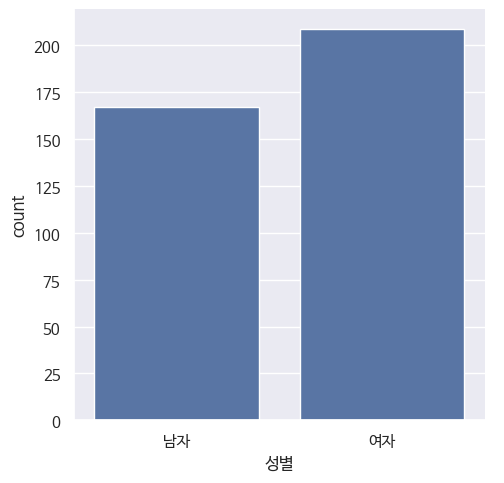

In [ ]:
# 범주형 변수(막대그래프)
sns.catplot(x = "성별",
            kind = "count",
            data = online_df)
plt.show()

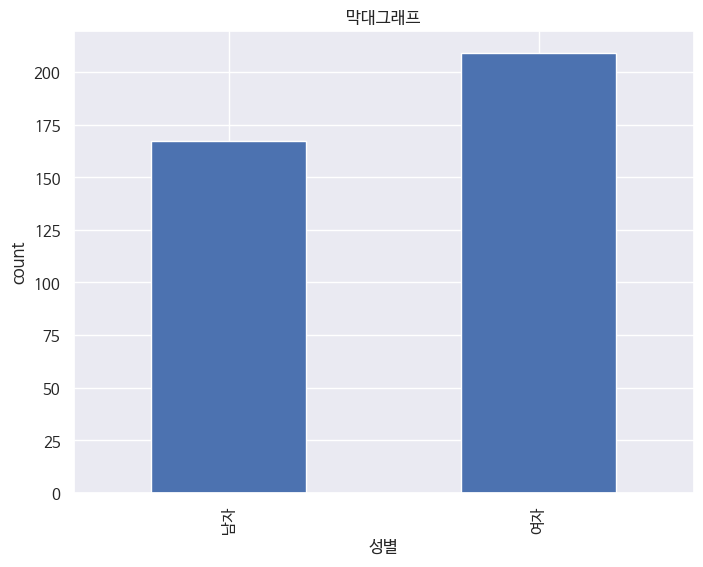

In [ ]:
#pd_plot 이용
ax = freq_table["count"].plot(figsize = (8, 6),
                              kind = "bar")
ax.set(title = '막대그래프',
       xlabel = '성별',
       ylabel = "count")
plt.show()

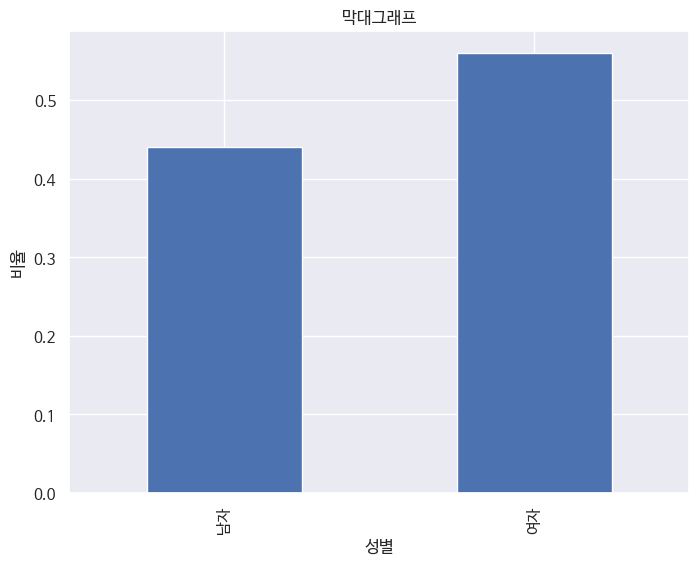

In [ ]:
#pd_plot 이용(비율)
ax = freq_table["prop"].plot(figsize = (8, 6),
                              kind = "bar")
ax.set(title = '막대그래프',
       xlabel = '성별',
       ylabel = "비율")
plt.show()

## 4.범주형 변수(2개)

### 4.1 분할표(Cross-tablation)

In [ ]:
cross_table = pd.crosstab(index = online_df["결혼"],
                         columns = online_df["학력"])
cross_table

학력,고졸,대졸,대학생,초중고생
결혼,,,,
결혼,19,27,40,15
미혼,53,97,84,41


In [ ]:
# margins
cross_table = pd.crosstab(index = online_df["결혼"],
                          columns = online_df["학력"],
                          margins = True)
# cross_table.index = ["남자","여자"]
cross_table

학력,고졸,대졸,대학생,초중고생,All
결혼,,,,,
결혼,19,27,40,15,101
미혼,53,97,84,41,275
All,72,124,124,56,376


In [ ]:
# 정리
cross_table.index = ["결혼","미혼", "열전체"]
cross_table.columns = ["고졸","대졸","대학생","초중고생","행전체"]

cross_table

,고졸,대졸,대학생,초중고생,행전체
결혼,19,27,40,15,101
미혼,53,97,84,41,275
열전체,72,124,124,56,376


In [ ]:
# 전체비율
cross_table/cross_table.loc["열전체","행전체"]

,고졸,대졸,대학생,초중고생,행전체
결혼,0.050532,0.071809,0.106383,0.039894,0.268617
미혼,0.140957,0.257979,0.223404,0.109043,0.731383
열전체,0.191489,0.329787,0.329787,0.148936,1.000000


In [ ]:
# 열비율
cross_table/cross_table.loc["열전체"]

,고졸,대졸,대학생,초중고생,행전체
결혼,0.263889,0.217742,0.322581,0.267857,0.268617
미혼,0.736111,0.782258,0.677419,0.732143,0.731383
열전체,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 행비율
cross_table.div(cross_table["행전체"], axis=0)

,고졸,대졸,대학생,초중고생,행전체
결혼,0.188119,0.267327,0.396040,0.148515,1.0
미혼,0.192727,0.352727,0.305455,0.149091,1.0
열전체,0.191489,0.329787,0.329787,0.148936,1.0


In [ ]:
# 전체비율 저장
cross_table_prop = cross_table/cross_table.loc["열전체","행전체"]

### 4.2 그래프 그리기(막대 그래프)

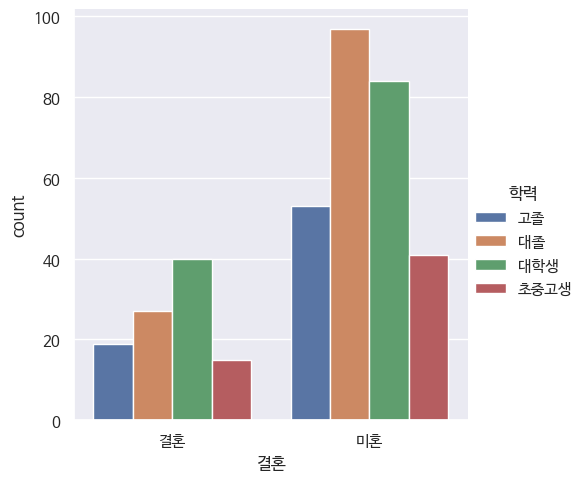

In [ ]:
# 누적 막대그래프(count)
sns.catplot(x = "결혼",
            hue = "학력",
            kind = "count",
            data = online_df)
plt.show()